#### EXPERIMENT - 





<b> Hypothesis</b> - Trying to model the dataset to accurately process transaction data in the order of likelihood

<b> Design</b> - Here the accuracy is calculated based on F1 score, ROC curves

<b> Author Name</b> - Amith K A 

<b> Time for the Experiment </b> - 12 Hours

<b> Total run time of Notebook </b> - 61.578125 seconds

<b> System  </b> - Windows, 4 Core, 16 GB

<b> Release </b> - 10

<b> Version </b> - 10.0.19041

<b> Machine </b> - AMD64

<b> Processor </b> - Intel64 Family 6 Model 158 Stepping 9, GenuineIntel


#### Pointers for the experiment

 - EDA is performed, based on this the features that hold no significance is removed
 
  
 - The EDA I would perform on the dataset is "To-the-book" or very basic to say the least as no domain coverage has been shared
 
 
 - I would be running a few different models and the following notebook would have all details
 
 
 - Finally, I would be picking one model out of the various interations run based on personal discretion

#### <u>STEPS</u>
 > 1. Importing the necessary packages, <b>Status</b> - <i>Done</i>
 > 2. EDA - Descriptive stats, <b>Status</b> - <i>Done</i>
 > 3. EDA - Correlation analysis, <b>Status</b> - <i>Done</i>
 > 4. EDA - Missing value treatment, <b>Status</b> - <i>Not Required</i>
 > 5. EDA - Outlier analysis, <b>Status</b> - <i>Not required</i>
 > 6. Modelling, Random Forest, <b>Status</b> - <i>Done</i>
 > 7. PCA Analysis performed, This was not a good measure, <b>Status</b> - <i>Done</i>
 > 8. Evaluation, <b>Status - 6 Models - </b> - <i>Done</i>
 > 9. Alternative methods, <b>Status</b> - <i>Done</i>
 > 10. Final Inference, <b>Status</b> - <i>Done</i>

#### <u>ASSUMPTIONS</u>
 > For the interest of time, different iterations have not been assessed
    - We have no missing values or the 0 indicated in columns does not suggest the value is missing
    - The data provided is sufficnet enough to make a baseline model
    - As per Occam's razor, we are electing the simplistic model. Complex versions involving LSTMs or Deep neural networks is not used here


In [1]:
#Importing the necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set_theme()
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [224]:
# import types
# def imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             yield val.__name__
# list(imports())

In [223]:
#print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

In [4]:
DF=pd.read_csv("./Desktop/Tide_test_DS/Tide_test_DS/data_interview_test.csv",sep=":")

In [5]:
DF.describe()

,company_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,27247.797906,0.217901,0.031660,0.021522,0.986455,0.013877,0.024215,0.037893,0.753532,0.001005,0.076533
std,12024.542988,0.384535,0.122611,0.116995,0.115597,0.116987,0.128646,0.190945,0.430972,0.020134,0.265860
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,50000.000000,1.000000,0.900000,0.800000,1.000000,1.000000,0.800000,1.000000,1.000000,0.600000,1.000000


In [6]:
# Removing "DifferentPredictedTime" as this is not a significant feature

In [7]:
DF.drop(columns="DifferentPredictedTime",inplace=True)

<AxesSubplot:>

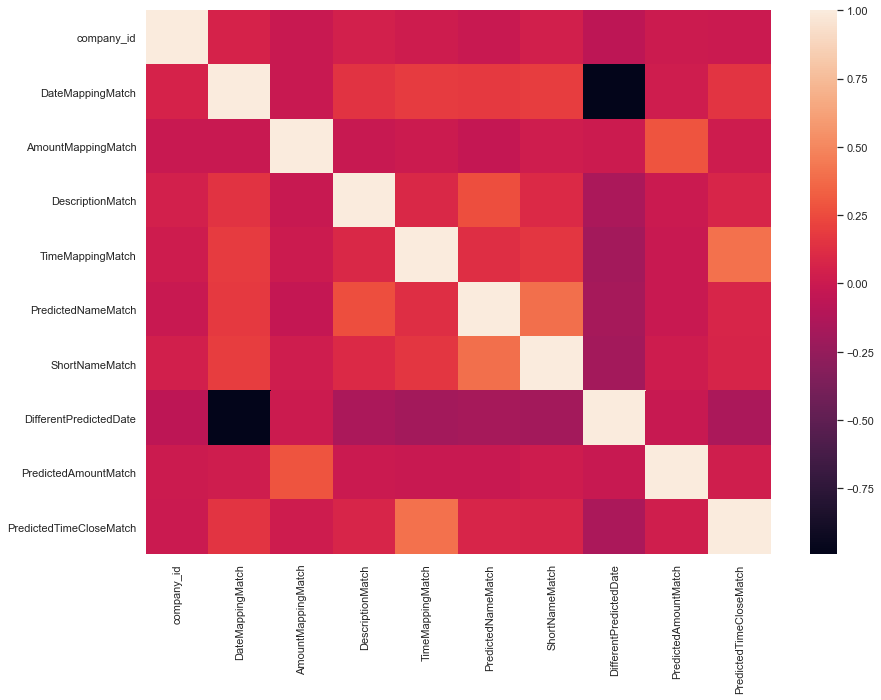

In [8]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(DF.corr(), ax=ax)

In [9]:
# Conditioning the matched_transaction_id, feature_transaction_id, receipt_id 

In [10]:
DF.matched_transaction_id=DF.matched_transaction_id.str.replace(',', '').astype(float)

In [11]:
DF.feature_transaction_id=DF.feature_transaction_id.str.replace(',', '').astype(float)

In [12]:
DF.receipt_id=DF.receipt_id.str.replace(',', '').astype(float)

### <u>EDA</u>

- Based on just analysing the data, it can be seen that the following columns are identifiers for receipts

> matched_transaction_id

> feature_transaction_id

> receipt_id

- They are however stored as strings and they need to be stored as numbers - We are converting them to float



<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

- The following columns are stored as some sort of  probability score of how likely a feature id matched. Eg - PredictedTimeCloseMatch of .4 would give 40% match

> AmountMappingMatch

> PredictedNameMatch

> PredictedAmountMatch

> DescriptionMatch

> DateMappingMatch


- The range specified in some of these columns are different and not stable. 


- For instance, we need to account for stable ranges this is done by Binning

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>


- The following Columns are binaries, i.e capable of holding either 0 or 1

> DifferentPredictedDate

> PredictedTimeCloseMatch

> ShortNameMatch

> TimeMappingMatch


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

- No missing value treatment needed as we do not have enough data which suggests that missing values could be zeros

- No outlier analysis needed here 

In [13]:
# Converting columns to categories

In [14]:
Column_list=list(DF.columns[4:])

In [15]:
len(Column_list)

9

In [16]:
Binaries = ['DifferentPredictedDate','PredictedTimeCloseMatch','ShortNameMatch','TimeMappingMatch']

In [17]:
Needed=list(set(Column_list)-set(Binaries))

In [18]:
for x in Binaries:
    DF[x]=DF[x].astype('category').cat.codes

In [19]:
Needed

['PredictedAmountMatch',
 'PredictedNameMatch',
 'DateMappingMatch',
 'DescriptionMatch',
 'AmountMappingMatch']

### <u>Binning</u>

- Illustration of binning. The idea here is that we cannot one hot encode - as we would be creating fixed labels. 


- For instance for the column 'DateMappingMatch', the results can vary both in the training, validation and prediction data


- One hot encoding this column would give rise to a lot of unknowns and the ability to handle those unknowns can have a severe effect on the model

In [20]:
x='DateMappingMatch'
pd.cut(DF[x], bins=[-1, .4, .6, .8, 1]).value_counts().to_frame().reset_index().reset_index().rename({'level_0':'Codes'}, axis=1)

,Codes,index,DateMappingMatch
0,0,"(-1.0, 0.4]",9068
1,1,"(0.8, 1.0]",2639
2,2,"(0.6, 0.8]",218
3,3,"(0.4, 0.6]",109


In [21]:
for x in Needed:
    DF[x]=pd.cut(DF[x], bins=[-1, .4, .6, .8, 1])

In [22]:
Needed

['PredictedAmountMatch',
 'PredictedNameMatch',
 'DateMappingMatch',
 'DescriptionMatch',
 'AmountMappingMatch']

In [23]:
for x in Needed:
    DF[x]=DF[x].cat.codes

In [24]:
# Finding matching columns, to determine correct matches

In [25]:
DF[DF.matched_transaction_id==DF.feature_transaction_id].head(3)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
25,10001.0,10000,10605.0,10605.0,3,0,0,0,0,0,0,0,0
27,10002.0,10000,10286.0,10286.0,3,0,0,0,2,0,0,0,0
38,10003.0,10000,10412.0,10412.0,3,0,0,0,0,1,0,0,0


In [26]:
DF['Match'] = np.where(DF.matched_transaction_id==DF.feature_transaction_id, "Yes","No")

In [27]:
Lister_No=DF[DF.Match=="Yes"].matched_transaction_id

In [28]:
#Saving a base copy to run different iterations

In [29]:
DF_One=DF.copy()

##### ==================================================================================================================

### Classification model 1 - We are sampling one positive data point and 1 negative data point 

##### ==================================================================================================================

- Intent here is that our dataset is not balanced, and we are sampling and balancing it


- Random Forest model is used



In [30]:
DF=DF_One.copy()

In [31]:
List_me=[]
def Analysing(x,num):
    #print(Column_list[x])
    row=x.values[2]
    Delt=list(DF[DF.Match=="No"][DF[DF.Match=="No"].matched_transaction_id==row].head(num).index)
    #print(Delt)
    List_me.append(Delt)
    
    #DF[Column_list[x]].hist().plot
    #print(DF[Column_list[x]].value_counts())

In [32]:

DF[DF.Match=="Yes"].apply(Analysing, axis=1, num=1)


25       None
27       None
38       None
73       None
105      None
         ... 
11975    None
11980    None
11993    None
12006    None
12033    None
Length: 857, dtype: object

In [33]:
len(List_me)

857

In [34]:
flat_list = [item for sublist in List_me for item in sublist]
    

In [35]:
flat_list_2=list(DF[DF.Match=="Yes"].index)

In [36]:
len(flat_list_2)

857

In [37]:
len(flat_list_2)+len(flat_list)

1690

In [38]:
len(flat_list)

833

In [39]:
flat_list.extend(flat_list_2)

In [40]:
len(flat_list)

1690

In [41]:
DF=DF[DF.index.isin(flat_list)]

<AxesSubplot:>

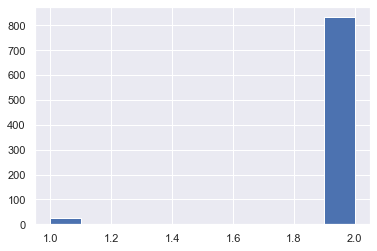

In [42]:
DF.matched_transaction_id.value_counts().hist()

In [43]:
len(list(set(DF[DF.Match=="Yes"].matched_transaction_id)))

857

In [44]:
DF[DF.Match=="No"][DF[DF.Match=="No"].matched_transaction_id.isin(Lister_No)]

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,Match
20,10001.0,10000,10605.0,10596.0,0,0,0,0,0,0,1,0,0,No
28,10002.0,10000,10286.0,10287.0,3,0,0,0,0,0,0,0,0,No
34,10003.0,10000,10412.0,10140.0,0,0,0,0,0,0,1,0,0,No
62,10005.0,10000,10474.0,10461.0,0,0,0,0,0,0,1,0,0,No
97,10007.0,10000,10360.0,10348.0,0,0,0,0,0,0,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,50221.0,50000,50034.0,50035.0,3,0,0,0,0,0,0,0,0,No
11979,50222.0,50000,50244.0,50243.0,3,0,0,0,0,0,0,0,0,No
11981,50223.0,50000,50342.0,50329.0,0,0,0,0,0,0,1,0,0,No
11995,50224.0,50000,50050.0,50038.0,0,2,0,0,0,0,1,0,0,No


In [45]:
#DF

In [46]:
#set(DF.matched_transaction_id)

In [47]:
#DF[DF.matched_transaction_id==10117]

In [48]:
DF_new=DF.copy()

In [49]:
DF.Match.value_counts()

Yes    857
No     833
Name: Match, dtype: int64

In [50]:
DF.drop(columns="feature_transaction_id",inplace=True)

In [51]:
X=DF.iloc[:,:-1]
Y=DF.iloc[:,-1]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [53]:
# smt = SMOTE(random_state=0)
# X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [54]:
# X_train_SMOTE.shape,y_train_SMOTE.shape

In [55]:
Final_Model = RandomForestClassifier()

In [56]:
Final_Model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
print(f"Cross validation score of the model : {cross_val_score(Final_Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.9391489703989704


In [58]:
#Model.fit(X_train_SMOTE,y_train_SMOTE)

In [59]:
Predictions=Final_Model.predict(X_test)

In [60]:
X_test.columns

Index(['receipt_id', 'company_id', 'matched_transaction_id',
       'DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'TimeMappingMatch', 'PredictedNameMatch', 'ShortNameMatch',
       'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch'],
      dtype='object')

In [61]:
cf_matrix = confusion_matrix(y_test, Predictions)
print(cf_matrix)

[[241  15]
 [ 11 240]]


<AxesSubplot:>

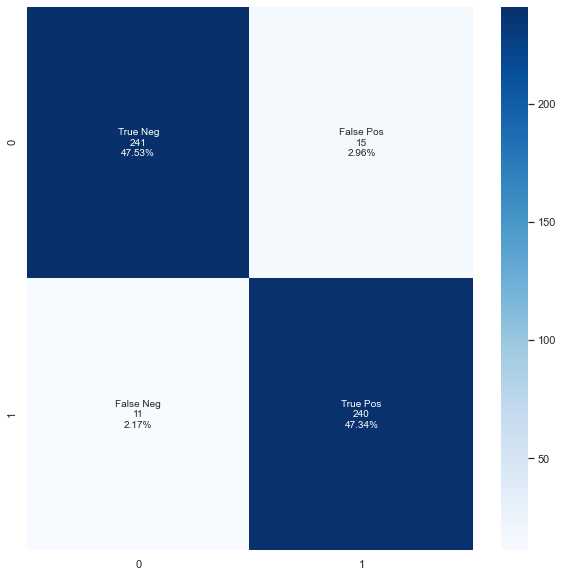

In [62]:
fig, ax = plt.subplots(figsize=(10,10))  
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [63]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

          No       0.96      0.94      0.95       256
         Yes       0.94      0.96      0.95       251

    accuracy                           0.95       507
   macro avg       0.95      0.95      0.95       507
weighted avg       0.95      0.95      0.95       507



In [64]:
Mapper={"Yes":1,"No":0}

In [65]:
y_test_temp=list(map(Mapper.get, y_test))

In [66]:
Predictions_temp=list(map(Mapper.get, Predictions))

In [67]:
This_1= roc_auc_score(y_test_temp, Predictions_temp)

In [68]:
print(f" AUC-ROC score is {This_1}")

 AUC-ROC score is 0.9487907744023905


In [69]:
fpr1, tpr1, _ = roc_curve(y_test_temp, Predictions_temp)

##### ==================================================================================================================

### Classification model 2 - We are sampling one positive data point and 1 negative data point 

##### ==================================================================================================================

- Intent here is that our dataset is not balanced, and we are sampling and balancing it


- Random Forest model is used



In [70]:
DF=DF_new.copy()

In [71]:
DF.drop(columns='feature_transaction_id',inplace=True)

In [72]:
DF["Weightage"]=DF.DateMappingMatch+DF.AmountMappingMatch+DF.DescriptionMatch+DF.TimeMappingMatch+DF.PredictedNameMatch+DF.ShortNameMatch+DF.DifferentPredictedDate+DF.PredictedAmountMatch+DF.PredictedTimeCloseMatch

In [73]:
DF=DF.sort_values(by=['matched_transaction_id','Weightage'],ascending=[True,False])

In [74]:
DF=DF[["receipt_id","company_id","matched_transaction_id","Weightage","Match"]]

In [75]:
DF.Match.value_counts()

Yes    857
No     833
Name: Match, dtype: int64

In [76]:
X=DF.iloc[:,:-1]
Y=DF.iloc[:,-1]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [78]:
Model = RandomForestClassifier()

In [79]:
Model.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
print(f"Cross validation score of the model : {cross_val_score(Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.9272844272844273


In [81]:
Predictions=Model.predict(X_test)

In [82]:
cf_matrix = confusion_matrix(y_test, Predictions)
print(cf_matrix)

[[235  25]
 [  8 239]]


<AxesSubplot:>

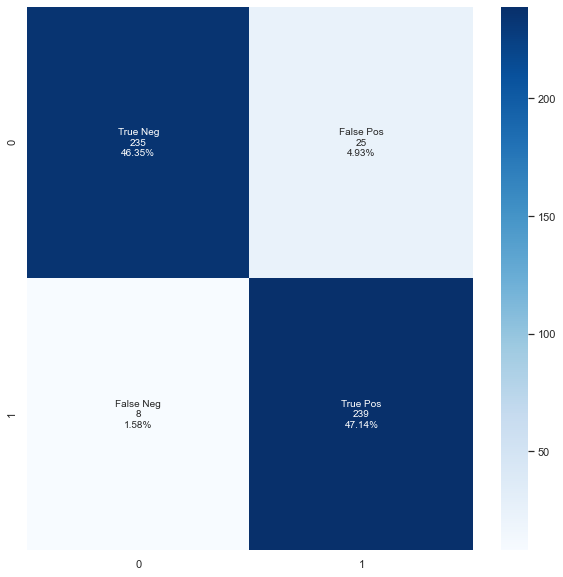

In [83]:
fig, ax = plt.subplots(figsize=(10,10))  
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [84]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

          No       0.97      0.90      0.93       260
         Yes       0.91      0.97      0.94       247

    accuracy                           0.93       507
   macro avg       0.94      0.94      0.93       507
weighted avg       0.94      0.93      0.93       507



In [85]:
Mapper={"Yes":1,"No":0}

In [86]:
y_test_temp=list(map(Mapper.get, y_test))

In [87]:
Predictions_temp=list(map(Mapper.get, Predictions))

In [88]:
This_2= roc_auc_score(y_test_temp, Predictions_temp)

In [89]:
print(f" AUC-ROC score is {This_2}")

 AUC-ROC score is 0.9357287449392713


In [90]:
fpr2, tpr2, _ = roc_curve(y_test_temp, Predictions_temp)

##### ==================================================================================================================

### Classification model 3 - We are sampling one positive data point and 2 negative data points 

##### ==================================================================================================================

- Intent here is that our dataset is not balanced, and we are sampling and balancing it (For each positive sample, 2 negative samples are chosen)


- Random Forest model is used





In [91]:
DF=DF_One.copy()

In [92]:

DF[DF.Match=="Yes"].apply(Analysing, axis=1, num=2)


25       None
27       None
38       None
73       None
105      None
         ... 
11975    None
11980    None
11993    None
12006    None
12033    None
Length: 857, dtype: object

In [93]:
len(List_me)

1714

In [94]:
flat_list = [item for sublist in List_me for item in sublist]
    

In [95]:
flat_list_2=list(DF[DF.Match=="Yes"].index)

In [96]:
len(flat_list_2)

857

In [97]:
len(flat_list_2)+len(flat_list)

3292

In [98]:
len(flat_list)

2435

In [99]:
flat_list.extend(flat_list_2)

In [100]:
len(flat_list)

3292

In [101]:
DF=DF[DF.index.isin(flat_list)]

In [102]:
DF.Match.value_counts()

No     1602
Yes     857
Name: Match, dtype: int64

In [103]:
DF.drop(columns="feature_transaction_id",inplace=True)

In [104]:
X=DF.iloc[:,:-1]
Y=DF.iloc[:,-1]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [106]:
# smt = SMOTE(random_state=0)
# X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [107]:
# X_train_SMOTE.shape,y_train_SMOTE.shape

In [108]:
Model = RandomForestClassifier()

In [109]:
Model.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
print(f"Cross validation score of the model : {cross_val_score(Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.8965600775193798


In [111]:
#Model.fit(X_train_SMOTE,y_train_SMOTE)

In [112]:
Predictions=Model.predict(X_test)

In [113]:
X_test

,receipt_id,company_id,matched_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
377,10032.0,10000,10302.0,0,0,0,0,0,0,1,0,0
257,10020.0,10000,10683.0,0,0,0,0,0,0,1,0,0
3782,20138.0,20000,20571.0,3,0,0,1,0,0,0,0,1
1063,10104.0,10000,10588.0,0,0,0,0,0,0,1,0,0
2478,20011.0,20000,20432.0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3872,20146.0,20000,20301.0,0,0,0,0,0,0,1,0,0
340,10028.0,10000,10279.0,0,0,0,0,0,0,1,0,0
3627,20120.0,20000,20541.0,0,0,0,0,0,0,1,0,0
10200,40152.0,40000,40498.0,3,0,0,0,0,0,0,0,0


In [114]:
cf_matrix = confusion_matrix(y_test, Predictions)
print(cf_matrix)

[[464  35]
 [ 22 217]]


<AxesSubplot:>

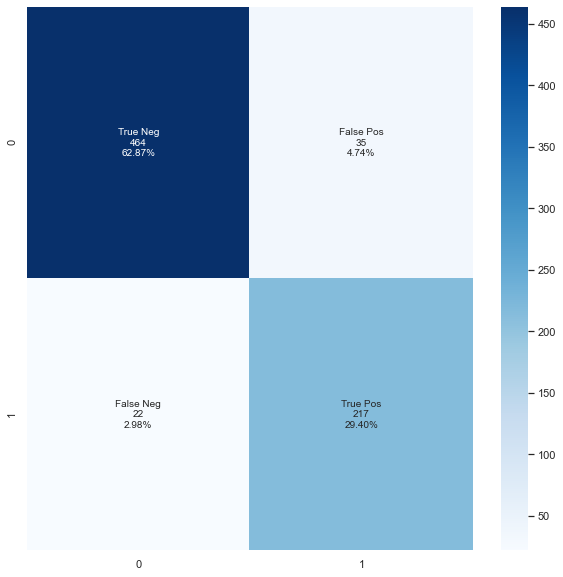

In [115]:
fig, ax = plt.subplots(figsize=(10,10))  
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [116]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       499
         Yes       0.86      0.91      0.88       239

    accuracy                           0.92       738
   macro avg       0.91      0.92      0.91       738
weighted avg       0.92      0.92      0.92       738



In [117]:
Mapper={"Yes":1,"No":0}

In [118]:
y_test_temp=list(map(Mapper.get, y_test))

In [119]:
Predictions_temp=list(map(Mapper.get, Predictions))

In [120]:
This_3= roc_auc_score(y_test_temp, Predictions_temp)

In [121]:
print(f" AUC-ROC score is {This_3}")

 AUC-ROC score is 0.9189047551169285


In [122]:
fpr3, tpr3, _ = roc_curve(y_test_temp, Predictions_temp)

##### ==================================================================================================================

### Classification model 4 - We are using the imbalanced dataset as it is

##### ==================================================================================================================

- Intent here is that our dataset is not balanced, and we are sampling and balancing it (For each positive sample, 2 negative samples are chosen)


- Random Forest model is used


- Random Forest being a Decision tree based algorithm is found to generalise well to imbalance of dataset, so this model would be attempting to find evidence in that




In [123]:
DF=DF_One.copy()

In [124]:
DF.Match.value_counts()

No     11177
Yes      857
Name: Match, dtype: int64

In [125]:
DF.drop(columns="feature_transaction_id",inplace=True)

In [126]:
X=DF.iloc[:,:-1]
Y=DF.iloc[:,-1]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [128]:
# smt = SMOTE(random_state=0)
# X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [129]:
# X_train_SMOTE.shape,y_train_SMOTE.shape

In [130]:
Model = RandomForestClassifier()

In [131]:
Model.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
print(f"Cross validation score of the model : {cross_val_score(Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.9456250970430311


In [133]:
#Model.fit(X_train_SMOTE,y_train_SMOTE)

In [134]:
Predictions=Model.predict(X_test)

In [135]:
X_test

,receipt_id,company_id,matched_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
6671,30154.0,30000,30543.0,3,0,0,0,0,0,0,0,0
455,10040.0,10000,10399.0,0,0,0,0,0,0,1,0,1
10407,40216.0,40000,40231.0,0,0,0,0,0,0,1,0,0
9983,40074.0,40000,40046.0,0,0,0,0,0,0,1,0,0
6373,30133.0,30000,30756.0,3,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
950,10095.0,10000,10356.0,0,0,0,0,0,0,1,0,0
4552,20204.0,20000,20438.0,0,0,0,0,0,0,1,0,0
1948,10176.0,10000,10606.0,0,0,0,0,0,0,1,0,0
5850,30091.0,30000,30497.0,0,0,0,0,0,0,1,0,0


In [136]:
cf_matrix = confusion_matrix(y_test, Predictions)
print(cf_matrix)

[[3271   77]
 [ 137  126]]


<AxesSubplot:>

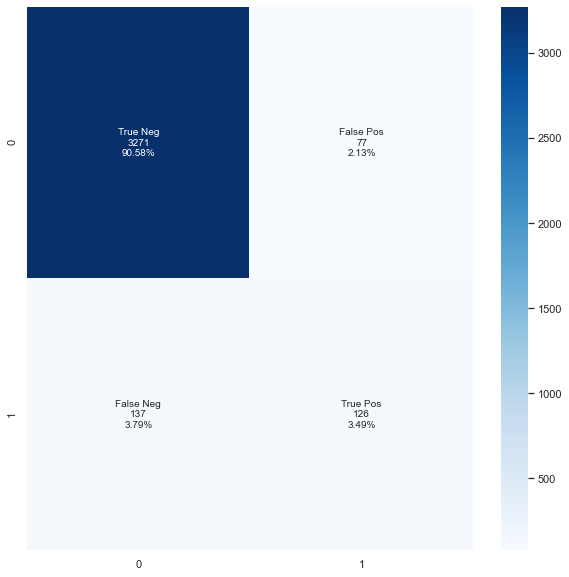

In [137]:
fig, ax = plt.subplots(figsize=(10,10))  
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [138]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97      3348
         Yes       0.62      0.48      0.54       263

    accuracy                           0.94      3611
   macro avg       0.79      0.73      0.75      3611
weighted avg       0.94      0.94      0.94      3611



In [139]:
Mapper={"Yes":1,"No":0}

In [140]:
y_test_temp=list(map(Mapper.get, y_test))

In [141]:
Predictions_temp=list(map(Mapper.get, Predictions))

In [142]:
This_4= roc_auc_score(y_test_temp, Predictions_temp)

In [143]:
print(f" AUC-ROC score is {This_4}")

 AUC-ROC score is 0.7280443236073065


In [144]:
fpr4, tpr4, _ = roc_curve(y_test_temp, Predictions_temp)

##### ==================================================================================================================

### Classification model 5 - We are using the imbalanced dataset as it is, and using SMOTE 

##### ==================================================================================================================

- Intent here is that our dataset is not balanced, and we are sampling and balancing it (For each positive sample, 2 negative samples are chosen)


- Random Forest model is used


- We are using the SMOTE algorithm to oversample the minority class



In [145]:
DF=DF_One.copy()

In [146]:
DF.Match.value_counts()

No     11177
Yes      857
Name: Match, dtype: int64

In [147]:
DF.drop(columns="feature_transaction_id",inplace=True)

In [148]:
X=DF.iloc[:,:-1]
Y=DF.iloc[:,-1]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [150]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [151]:
Model = RandomForestClassifier()

In [152]:
Model.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [153]:
print(f"Cross validation score of the model : {cross_val_score(Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.9440822256886895


In [154]:
Predictions=Model.predict(X_test)

In [155]:
X_test

,receipt_id,company_id,matched_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
8968,30337.0,30000,31325.0,2,0,0,0,0,0,0,0,0
9849,40046.0,40000,40333.0,3,0,0,0,0,0,0,0,0
2731,20035.0,20000,20434.0,0,0,0,0,0,0,1,0,0
5376,30054.0,30000,30678.0,3,0,1,0,0,1,0,0,0
9664,40000.0,40000,40419.0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
740,10077.0,10000,10595.0,0,0,0,0,0,0,1,0,0
7902,30252.0,30000,30791.0,0,0,0,0,0,0,1,0,0
4210,20175.0,20000,20073.0,0,0,0,0,0,0,1,0,0
5043,30028.0,30000,30884.0,0,0,0,0,0,0,1,0,0


In [156]:
cf_matrix = confusion_matrix(y_test, Predictions)
print(cf_matrix)

[[3209  149]
 [  92  161]]


<AxesSubplot:>

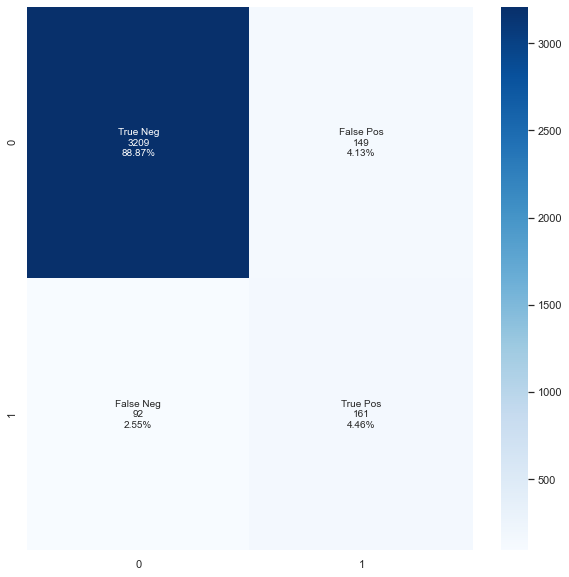

In [157]:
fig, ax = plt.subplots(figsize=(10,10))  
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [158]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

          No       0.97      0.96      0.96      3358
         Yes       0.52      0.64      0.57       253

    accuracy                           0.93      3611
   macro avg       0.75      0.80      0.77      3611
weighted avg       0.94      0.93      0.94      3611



In [159]:
Mapper={"Yes":1,"No":0}

In [160]:
y_test_temp=list(map(Mapper.get, y_test))

In [161]:
Predictions_temp=list(map(Mapper.get, Predictions))

In [162]:
This_5= roc_auc_score(y_test_temp, Predictions_temp)

In [163]:
print(f" AUC-ROC score is {This_5}")

 AUC-ROC score is 0.7959959932860469


In [164]:
fpr5, tpr5, _ = roc_curve(y_test_temp, Predictions_temp)

##### ==================================================================================================================

### Classification model 5 - We are using the imbalanced dataset and PCA is performed

##### ==================================================================================================================

- Intent here is that our dataset is not balanced, and we are sampling and balancing it (For each positive sample, 2 negative samples are chosen)


- Random Forest model is used


- PCA is used to find 95% variance and distribution of that along the features



In [165]:
DF=DF_One.copy()

In [166]:
DF.Match.value_counts()

No     11177
Yes      857
Name: Match, dtype: int64

In [167]:
DF.drop(columns="feature_transaction_id",inplace=True)

In [168]:
X=DF.iloc[:,:-1]
Y=DF.iloc[:,-1]

In [169]:
X.head(3)

,receipt_id,company_id,matched_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,10000.0,10000,10468.0,0,0,0,0,0,0,1,0,0
1,10000.0,10000,10468.0,0,0,0,0,0,0,1,0,0
2,10000.0,10000,10468.0,0,0,0,0,0,0,1,0,0


In [170]:
Scaler=StandardScaler()

In [171]:
Scaled=Scaler.fit_transform(X)

In [174]:
pca = PCA(.95)
principalComponents = pca.fit_transform(Scaled)
#principalDf = pd.DataFrame(data = principalComponents

In [175]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.30)

In [176]:
Model = RandomForestClassifier()

In [177]:
Model.fit(X_train,y_train)

RandomForestClassifier()

In [178]:
print(f"Cross validation score of the model : {cross_val_score(Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.9425377745640737


In [179]:
Predictions=Model.predict(X_test)

In [180]:
cf_matrix = confusion_matrix(y_test, Predictions)
print(cf_matrix)

[[3295   64]
 [ 131  121]]


<AxesSubplot:>

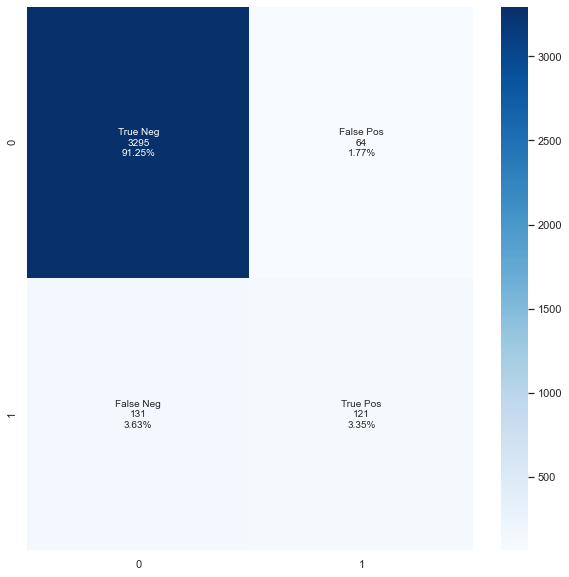

In [181]:
fig, ax = plt.subplots(figsize=(10,10))  
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

In [182]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97      3359
         Yes       0.65      0.48      0.55       252

    accuracy                           0.95      3611
   macro avg       0.81      0.73      0.76      3611
weighted avg       0.94      0.95      0.94      3611



In [183]:
Mapper={"Yes":1,"No":0}

In [184]:
y_test_temp=list(map(Mapper.get, y_test))

In [185]:
Predictions_temp=list(map(Mapper.get, Predictions))

In [186]:
This_6= roc_auc_score(y_test_temp, Predictions_temp)

In [187]:
print(f" AUC-ROC score is {This_6}")

 AUC-ROC score is 0.7305527202445928


In [188]:
fpr6, tpr6, _ = roc_curve(y_test_temp, Predictions_temp)

##### ==================================================================================================================

### Comparing AUC-ROC curves

##### ==================================================================================================================

- Here we are comparing all the models on the basis of their AUC-ROC curves


##### <u>LEGEND</u>


- Model 1 - Sampled equally, using all features


- Model 2 - Sampled equally, using Weightage column (Other features dropped)


- Model 3 - Sampled in 1:2 ratio (One positive would have 2 Negative samples)


- Model 4 - No sampling, all data is used 


- Model 5 - No sampling, all data is used using SMOTE to account for imbalance


- Model 6 - No sampling, PCA is used


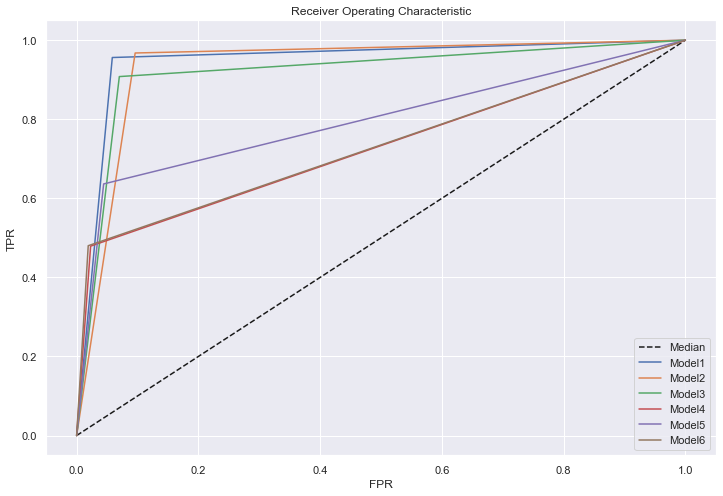

In [189]:
plt.figure(figsize=(12,8))
plt.plot([0,1],[0,1], 'k--', label="Median")
plt.plot(fpr1, tpr1, label= "Model1")
plt.plot(fpr2, tpr2, label= "Model2")
plt.plot(fpr3, tpr3, label= "Model3")
plt.plot(fpr4, tpr4, label= "Model4")
plt.plot(fpr5, tpr5, label= "Model5")
plt.plot(fpr6, tpr6, label= "Model6")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

- <b>Inference</b> - Based on the AUC ROC curves above, I have elected to proceed with Model 2, which was sampled equally (Trained on equal data <i>(Positive and Negative)</i> sampled from the dataset provided)

Note : However, based on the use case, other models can be employed. This depends more on what sort of a business objective you're trying to focus toward

##### ==================================================================================================================

### Prediction Model, consuming Model 1

##### ==================================================================================================================

- Here we are using Model 1 from above



- We are defining a function which takes in data and does all pre-processing steps



- Then as an output, we are returning a Dataframe which is sorted by Weightage





In [190]:
def Preprocess(Data):
    Binaries = ['DifferentPredictedDate','PredictedTimeCloseMatch','ShortNameMatch','TimeMappingMatch']
    Needed=['AmountMappingMatch',
             'PredictedNameMatch',
             'PredictedAmountMatch',
             'DescriptionMatch',
             'DateMappingMatch']

    if "DifferentPredictedTime" in Data.columns: 
        Data.drop(columns="DifferentPredictedTime",inplace=True)
        
    if "feature_transaction_id" in Data.columns: 
        Data.drop(columns="feature_transaction_id",inplace=True)
        
    if not Data.matched_transaction_id.dtype=='float64':
        Data.matched_transaction_id=Data.matched_transaction_id.str.replace(',', '').astype(float)
    #if not Data.feature_transaction_id.dtype=='float64':
        #Data.feature_transaction_id=Data.feature_transaction_id.str.replace(',', '').astype(float)
    if not Data.receipt_id.dtype=='float64':
        Data.receipt_id=Data.receipt_id.str.replace(',', '').astype(float)
        
    for x in Binaries:
        Data[x]=Data[x].astype('category').cat.codes
    for x in Needed:
        Data[x]=pd.cut(Data[x], bins=[-1, .4, .6, .8, 1])
        Data[x]=Data[x].cat.codes
    Data["Weightage"]=Data.DateMappingMatch+Data.AmountMappingMatch+Data.DescriptionMatch+Data.TimeMappingMatch+Data.PredictedNameMatch+Data.ShortNameMatch+Data.DifferentPredictedDate+Data.PredictedAmountMatch+Data.PredictedTimeCloseMatch
    #print(Data.columns)
    Predictions=Final_Model.predict(Data.iloc[:,:-1])
    Data["Match"]=Predictions
    Data=Data.sort_values(by=["matched_transaction_id","Weightage"], ascending =[True, False])
    return Data    

In [191]:
Data=pd.read_csv("./Desktop/Tide_test_DS/Tide_test_DS/data_interview_test.csv",sep=":",nrows=200)

In [192]:
Required=Preprocess(Data)

    

In [193]:
Required.tail(20)

,receipt_id,company_id,matched_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,Weightage,Match
22,10001.0,10000,10605.0,0,0,0,0,0,0,1,0,0,1,No
23,10001.0,10000,10605.0,0,0,0,0,0,0,1,0,0,1,No
24,10001.0,10000,10605.0,0,0,0,0,0,0,1,0,0,1,No
170,10011.0,10000,10659.0,3,0,0,0,1,0,0,0,1,5,Yes
165,10011.0,10000,10659.0,2,0,1,0,0,0,0,0,0,3,No
169,10011.0,10000,10659.0,3,0,0,0,0,0,0,0,0,3,No
163,10011.0,10000,10659.0,2,0,0,0,0,0,0,0,0,2,No
164,10011.0,10000,10659.0,2,0,0,0,0,0,0,0,0,2,No
154,10011.0,10000,10659.0,0,0,0,0,0,0,1,0,0,1,No
155,10011.0,10000,10659.0,0,0,0,0,0,0,1,0,0,1,No


##### ==================================================================================================================

### Alternative approach

##### ==================================================================================================================

- Here are using a Scoring criteria to train a model


- The idea here is to create Scores for each data row, which is a cumulative of all the Matched probabilities


- Scoring for matched rows is given as a maximum (10)


- This Scoring column is the Label


- Model is trained in this manner





In [194]:
DF=DF_One.copy()

In [195]:
DF.Match.value_counts()

No     11177
Yes      857
Name: Match, dtype: int64

In [196]:
#DF["Scoring"]=DF.DateMappingMatch+DF.AmountMappingMatch+DF.DescriptionMatch+DF.TimeMappingMatch+DF.PredictedNameMatch+DF.ShortNameMatch+DF.DifferentPredictedDate+DF.PredictedAmountMatch+DF.PredictedTimeCloseMatch

In [197]:
DF["Scoring"]=np.where(DF.Match=="Yes", 10,DF.DateMappingMatch+DF.AmountMappingMatch+DF.DescriptionMatch+DF.TimeMappingMatch+DF.PredictedNameMatch+DF.ShortNameMatch+DF.DifferentPredictedDate+DF.PredictedAmountMatch+DF.PredictedTimeCloseMatch)

In [198]:
DF.Scoring.value_counts()

1     8286
3     1765
10     857
2      764
4      254
5       73
6       27
7        8
Name: Scoring, dtype: int64

In [199]:
#DF.iloc[:,:-2]

In [200]:
X=DF.iloc[:,:-2]
Y=DF.Scoring

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [202]:
Temp=X_test.copy()

In [203]:
X_train.drop(columns="feature_transaction_id",inplace=True)
X_test.drop(columns="feature_transaction_id",inplace=True)

In [204]:
# smt = SMOTE(random_state=0)
# X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [205]:
# X_train_SMOTE.shape,y_train_SMOTE.shape

In [206]:
#y_test.value_counts()

In [207]:
Final_Model = RandomForestClassifier()

In [208]:
Final_Model.fit(X_train,y_train)

RandomForestClassifier()

In [209]:
print(f"Cross validation score of the model : {cross_val_score(Final_Model, X_train, y_train, cv=8).mean()}")

Cross validation score of the model : 0.9432510408429293


In [210]:
#Model.fit(X_train_SMOTE,y_train_SMOTE)

In [211]:
Predictions=Final_Model.predict(X_test)

In [212]:
Temp["Preds"]=Predictions
Temp["Actual"]=y_test

In [228]:
# Recommendations would look like this

In [231]:
Temp[Temp.matched_transaction_id==30398.0].sort_values(by=["matched_transaction_id","Preds"], ascending=[True, False])

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,Preds,Actual
7311,30203.0,30000,30398.0,30397.0,3,0,0,0,0,0,0,0,0,3,3
7312,30203.0,30000,30398.0,30398.0,3,0,0,0,0,0,0,0,0,3,10
7310,30203.0,30000,30398.0,30396.0,3,0,0,0,0,0,0,0,0,3,3
7301,30203.0,30000,30398.0,30387.0,0,0,0,0,0,0,1,0,0,1,1
7302,30203.0,30000,30398.0,30388.0,0,0,0,0,0,0,1,0,0,1,1
7295,30203.0,30000,30398.0,30255.0,0,0,0,0,0,0,1,0,0,1,1
7299,30203.0,30000,30398.0,30383.0,0,0,0,0,0,0,1,0,0,1,1
7305,30203.0,30000,30398.0,30391.0,0,0,0,0,0,0,1,0,0,1,1
7297,30203.0,30000,30398.0,30257.0,0,0,0,0,0,0,1,0,0,1,1
7296,30203.0,30000,30398.0,30256.0,0,0,0,0,0,0,1,0,0,1,1


In [213]:
cf_matrix = confusion_matrix(y_test, Predictions,labels=list(set(y_test)))
#print(cf_matrix)

<AxesSubplot:>

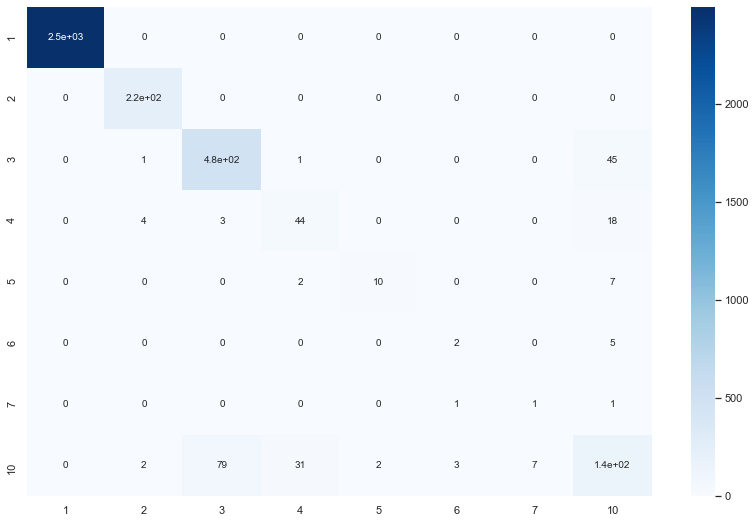

In [214]:
df_cm = pd.DataFrame(cf_matrix, columns=list(set(y_test)),index=list(set(y_test)))
#df_cm
plt.figure(figsize = (14,9))
sns.heatmap(df_cm, annot=True,cmap='Blues')

In [215]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2494
           2       0.97      1.00      0.98       225
           3       0.85      0.91      0.88       528
           4       0.56      0.64      0.60        69
           5       0.83      0.53      0.65        19
           6       0.33      0.29      0.31         7
           7       0.12      0.33      0.18         3
          10       0.65      0.53      0.59       266

    accuracy                           0.94      3611
   macro avg       0.67      0.65      0.65      3611
weighted avg       0.94      0.94      0.94      3611



In [216]:
This_1= roc_auc_score(y_test_temp, Predictions_temp)

In [217]:
print(f" AUC-ROC score is {This_1}")

 AUC-ROC score is 0.7305527202445928


In [218]:
fpr1, tpr1, _ = roc_curve(y_test_temp, Predictions_temp)

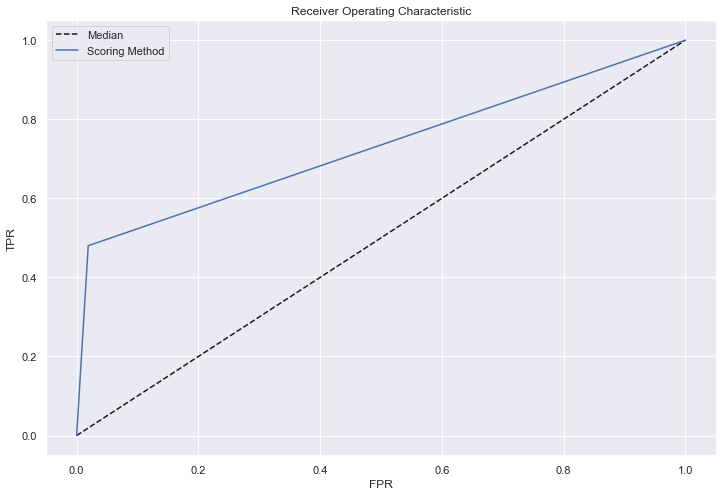

In [219]:
plt.figure(figsize=(12,8))
plt.plot([0,1],[0,1], 'k--', label="Median")
plt.plot(fpr1, tpr1, label= "Scoring Method")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

- The above model is also showing significant results, however we've added more classes to the model


- The idea here is to create Scores for each data row, which is a cumulative of all the Matched probabilities


- Scoring for matched rows is given as a maximum (10)


- This Scoring column is the Label


- Model is trained in this manner





<b>Final Inference</b> -

- We can combine both these models to come up with a model which uses the best of both worlds, however for the interest of time this is not done